# Regression Tutorial



## what is Regression ?
<hr>
Regression is a statistical measure used in finance, investing and other disciplines that attempts to determine the strength of the relationship between one dependent variable (usually denoted by Y) and a series of other changing variables (known as independent variables).<br><br> Regression helps investment and financial managers to value assets and understand the relationships between variables, such as commodity prices and the stocks of businesses dealing in those commodities.


## Achievement
<hr>
If we have an input vector X<sup>T</sup> = ( X<sub>1</sub>,X<sub>2</sub>...,X<sub>p</sub> )<br>
And we want to predict a real-valued output Y.<br>
The linear regression model has the form - 
![](https://i.imgur.com/6bJx5tn.png)
<br>
Here the β<sub>j</sub> ’s are unknown parameters or coefficients, and the variables X<sub>j</sub> can come
from our input.<br><br>
We supposed to do regression so that we can get suitable parameters of β<sub>j</sub> and β<sub>0</sub>, and then the linear equation is our target function .

## About linear and non-linear
<hr>
* **Linear regression:**<br><br>
A model is linear when each term is either a constant or the product of a parameter and a predictor variable.<br> A linear equation is constructed by adding the results for each term.<br>
This constrains the equation to just one basic form like above one.
<br>
![](https://i.imgur.com/g9vrD79.png)
<br>
![](https://i.imgur.com/7wRKbTB.png)
<br><br><br><br>
* **Non-linear regression:**<br><br>
While a linear equation has one basic form, nonlinear equations can take many different forms.<br>The easiest way to determine whether an equation is nonlinear is to focus on the term “nonlinear” itself.<br> Literally, it’s not linear. If the equation doesn’t meet the criteria above for a linear equation, it’s nonlinear.<br>
such as Sin(x), exponetial function , and weibull growth ...
<br>

<br>
![](https://i.imgur.com/VbaosV9.png)

## Linear regression
<hr>

## Import packages
<hr>
Import packages to make most of the third-party functions work.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset
<hr>
We generate the dataset at will.<br>
Also we supposed to sample the data from normal distrbution, and define the reange from -127 to 100.


In [2]:
sample_num = 50
split_rate = 0.2 # HOW TO DIVIDE TRAINING DATA AND TESTING DATA
c = np.round(np.random.uniform(-273,100,sample_num))
#c.sort()
f = np.round((9/5)*c + 32)
f,c

(array([  -6., -177., -368., -405.,  -51.,   86.,  -67., -150., -337.,
        -153., -270., -382., -332.,   30.,  133.,  -60., -141.,  -38.,
          48.,  138., -159., -195., -369., -299.,  201., -206., -195.,
          45., -357.,   34.,  100., -296., -197.,  158., -243., -245.,
         158.,  203., -414., -387., -180., -312., -409., -110., -369.,
         111., -162.,  109., -211.,  201.]),
 array([ -21., -116., -222., -243.,  -46.,   30.,  -55., -101., -205.,
        -103., -168., -230., -202.,   -1.,   56.,  -51.,  -96.,  -39.,
           9.,   59., -106., -126., -223., -184.,   94., -132., -126.,
           7., -216.,    1.,   38., -182., -127.,   70., -153., -154.,
          70.,   95., -248., -233., -118., -191., -245.,  -79., -223.,
          44., -108.,   43., -135.,   94.]))

In [3]:
# original data combine with bias,
# just like y = Ax + b
c = c.reshape(-1,1)
c_b = np.concatenate((c, np.ones(len(c)).reshape(-1,1)), axis=1)

# training data
train_X = c_b[:-round(sample_num*split_rate)]
train_y = f[:-round(sample_num*split_rate)]

# testing data
test_X = c_b[-round(sample_num*split_rate):]
test_y = f[-round(sample_num*split_rate):]

## Least Square Equation

Mathematically, linear least squares is the problem of approximately solving an overdetermined system of linear equations, where the best approximation is defined as that which minimizes the sum of squared differences between the data values and their corresponding modeled values. The approach is called linear least squares since the assumed function is linear in the parameters to be estimated. 

from wiki  https://en.wikipedia.org/wiki/Linear_least_squares_(mathematics)

In [4]:
def least_square_equation(X, y):
    # write down the answer of Least square equation !
    # (X.T*X)^-1*X.T*y
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

## Residual sum of squares  (RSS)
<hr>
In statistics, the residual sum of squares (RSS), also known as the sum of squared residuals (SSR) or the sum of squared errors of prediction (SSE), is the sum of the squares of residuals (deviations predicted from actual empirical values of data).<br> It is a measure of the discrepancy between the data and an estimation model.<br> A small RSS indicates a tight fit of the model to the data. It is used as an optimality criterion in parameter selection and model selection.

from wiki https://en.wikipedia.org/wiki/Residual_sum_of_squares
<br><br>
![](https://i.imgur.com/Pk4hmWp.png)

In [5]:
def sum_of_square_error(fx, y):
    E = y - fx
    # write down the answer of Sum square error !
    # E.T*E
    return np.dot(E.T,E)

## Linear regression method

the entry of LR.

In [6]:
def linear_regression(X, y):
    W = least_square_equation(X, y)
    return W # the weight A ([weight]*[x] = [y])

In [7]:
# get weight
weight = linear_regression(train_X,train_y) 
# weight * X
pred_y = np.sum(weight*test_X, axis=1) 
# get current error
RSS = sum_of_square_error(pred_y, test_y)

In [8]:
# the total error in this testing phase
RSS

0.7016952331959481

In [9]:
# the predict weight as opposed to initial weight: (9/5)*x + 32
weight

array([ 1.79955132, 31.93484336])

In [10]:
# the prediction curve
X = np.arange(-273, 100,1)
x = np.concatenate((X.reshape(-1,1), np.ones(len(X)).reshape(-1,1)), axis=1)
fx = np.dot(x, weight)

In [11]:
# the actural curve
real_X = np.arange(-273, 100,1)
real_fx = np.round((9/5)*X + 32)

## Visualization
<br>
We can identify the result of our prediction !<br>

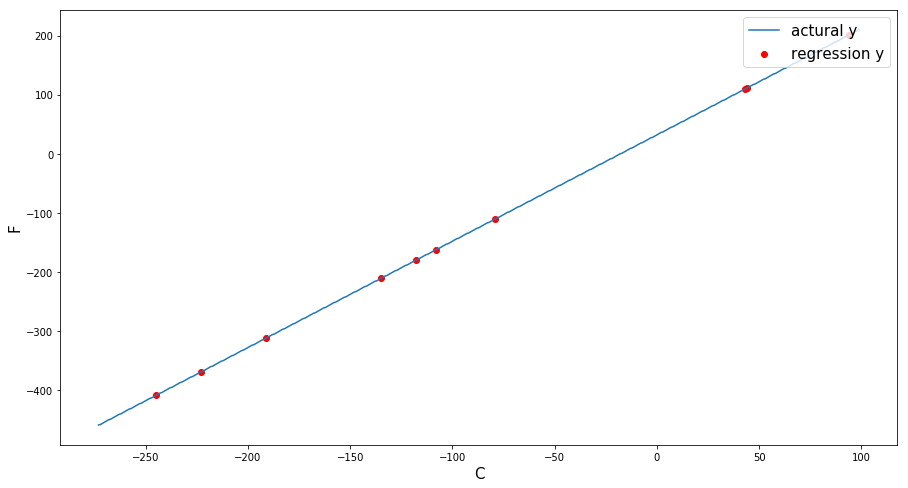

In [12]:
plt.figure(figsize=(15,8))
plt.plot(real_X,real_fx, label='actural y') # the actural curve 
#plt.plot(X,fx, label='predict y') # the prediction curve
plt.scatter(test_X[:,0] ,pred_y,  label='regression y',c='r')
plt.legend(loc='upper right',prop={'size': 15})
plt.ylabel('F',fontsize=15)
plt.xlabel('C',fontsize=15)
plt.show()
plt.close()

## Non-linear regression

## Import packages

Import packages to make most of the third-party functions work.


In [13]:
import csv
import numpy as np

## Read data from .csv

The simple way to read data from our .csv file.


In [14]:
price_list = list()

# read s&p500 data
with open('data/SP500.csv','r') as f:
    for row in csv.reader(f,delimiter=','):
            price_list.append(row)

  ## Save as numpy array
  
  It's such a better data type to store data.<br>

In [15]:
'''  
Because the index of 0 is the schema of our dataset, we needn't it.

'''

data = np.array(price_list)[1:,1:]
date =  np.array(price_list)[1:,0]
data = np.float32(data)

## Supposed to split them into two parts, training data and testing data.

We predict next price(close) from the current data.

In [16]:
split_rate = 0.2 # HOW TO DIVIDE TRAINING DATA AND TESTING DATA


# training data
train_X = data[:-round(len(data)*split_rate)-1]
train_y = data[1:-round(len(data)*split_rate), 3].reshape(-1,1) # index of close is 3th.

# testing data
test_X = data[-round(len(data)*split_rate)-1:-1]
test_y = data[-round(len(data)*split_rate):, 3].reshape(-1,1)

date = date[-round(len(data)*split_rate):]

## Import scikit learn library


In [17]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

## LinearRegression

In [18]:
# Create linear regression object
regr = linear_model.LinearRegression()

## Training

In [19]:
# Train the model using the training sets
regr.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Prediction

In [20]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(test_X)

In [21]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[0.19902088 0.19935505 0.19912232 0.1989948  0.1989948  0.        ]]


## Loss functon (MSE)
<hr>
In statistics, the mean squared error (MSE) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and what is estimated.<br> MSE is a risk function, corresponding to the expected value of the squared error loss.<br> The fact that MSE is almost always strictly positive is because of randomness or because the estimator does not account for information that could produce a more accurate estimate.
<br>
The MSE is a measure of the quality of an estimator—it is always non-negative, and values closer to zero are better.
<br><br>
![](https://i.imgur.com/qYaL1sl.png)

In [22]:
# def mean_squared_error(predictions, targets):
#     return np.sqrt(((predictions - targets) ** 2).mean())

In [23]:
# The mean squared error from scikit learn package
print("Mean squared error: %.2f" % mean_squared_error(test_y, diabetes_y_pred))

Mean squared error: 450.07


## Score
<hr>
Returns the coefficient of determination R<sup>2</sup> of the prediction.
<br><br>
The coefficient R<sup>2</sup> is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred)<sup>2</sup>).sum() and v is the total sum of squares ((y_true - y_true.mean())<sup>2</sup>).sum(). <br><br>The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [24]:

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y, diabetes_y_pred))

Variance score: 0.97


## Visualization

We can identify the result of our prediction !<br>

In [25]:
from matplotlib import pyplot as plt

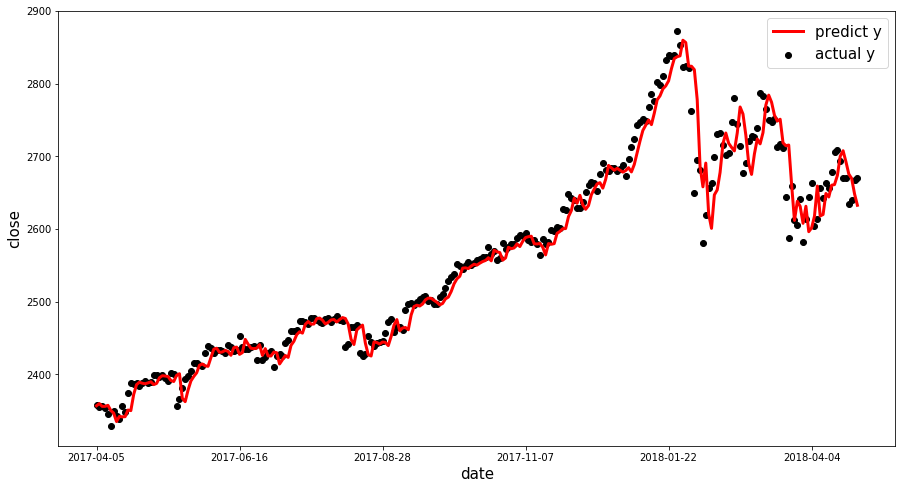

In [26]:
# Plot outputs
plt.figure(figsize=(15,8))
plt.scatter(range(len(test_y)-1), test_y[1:],  color='black',label='actual y')
plt.plot(range(len(test_y)-1), diabetes_y_pred[:-1], color='red',label='predict y', linewidth=3)
plt.legend(loc='upper right',prop={'size': 15})
plt.ylabel('close',fontsize=15)
plt.xlabel('date',fontsize=15)
plt.xticks(range(len(test_y)-1)[::50], date[::50])
plt.show()
plt.close()

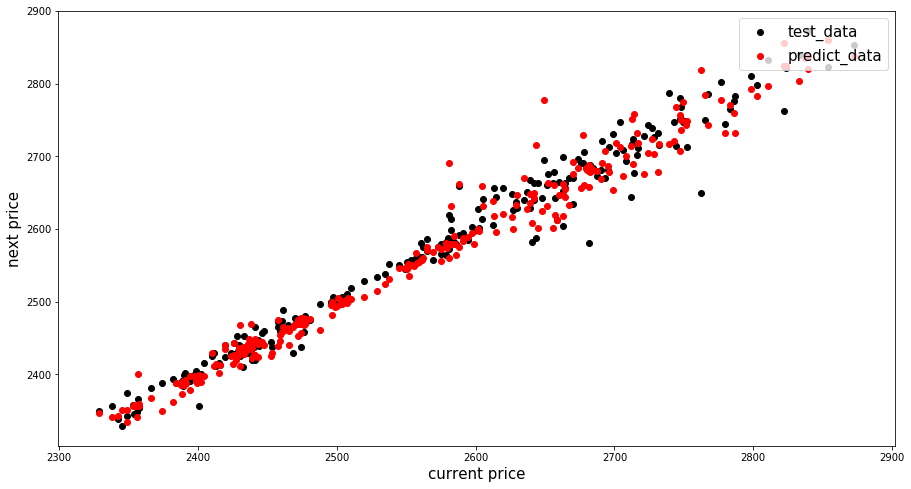

In [27]:
# Plot outputs
plt.figure(figsize=(15,8))
plt.scatter(test_y[:-1], test_y[1:],  color='black',label='test_data')
plt.scatter(test_y[:-1], diabetes_y_pred[:-1], color='red',label='predict_data')
plt.legend(loc='upper right',prop={'size': 15})
plt.ylabel('next price',fontsize=15)
plt.xlabel('current price',fontsize=15)
plt.show()
plt.close()